In [1]:
# Step 0: Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import Normalize, LinearSegmentedColormap, to_rgb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mplsoccer import Pitch
import os

# -------------------- Folder path --------------------
data_folder = r'Datasets\xP_master\Calibrated passes data'

# -------------------- Load datasets --------------------
euros_all = pd.read_csv(os.path.join(data_folder, 'euros_all.csv'))
player_stats_euros = pd.read_csv(os.path.join(data_folder, 'player_stats_euros.csv'))
worldcup_all = pd.read_csv(os.path.join(data_folder, 'worldcup_all.csv'))
player_stats_worldcup_all = pd.read_csv(os.path.join(data_folder, 'player_stats_worldcup.csv'))
matches = pd.read_csv('Datasets/xP_master/matches.csv')

C:\Users\vicky\AppData\Local\Temp\ipykernel_33708\1296325920.py:16: DtypeWarning: Columns (11,43,45,49,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  euros_all = pd.read_csv(os.path.join(data_folder, 'euros_all.csv'))
C:\Users\vicky\AppData\Local\Temp\ipykernel_33708\1296325920.py:18: DtypeWarning: Columns (11,42,43,45,49,50,52,56) have mixed types. Specify dtype option on import or set low_memory=False.
  worldcup_all = pd.read_csv(os.path.join(data_folder, 'worldcup_all.csv'))


In [3]:
# Filter matches for Euros 2025 and World Cup 2023
euros_2025_matches = matches[
    (matches['competition'] == "Europe - UEFA Women's Euro") &
    (matches['season'] == "2025")
]
worldcup_2023_matches = matches[
    (matches['competition'] == "International - Women's World Cup") &
    (matches['season'] == "2023")
]

# -------------------- Get list of match IDs --------------------
euros_2025_match_ids = euros_2025_matches['match_id'].tolist()
worldcup_2023_match_ids = worldcup_2023_matches['match_id'].tolist()

# -------------------- Filter event datasets by match IDs --------------------
euros_2025 = euros_all[euros_all['match_id'].isin(euros_2025_match_ids)]
player_stats_euros_2025 = player_stats_euros[player_stats_euros['competition_name'] == "Europe - UEFA Women's Euro"]

worldcup_2023 = worldcup_all[worldcup_all['match_id'].isin(worldcup_2023_match_ids)]
player_stats_worldcup_2023 = player_stats_worldcup_all[player_stats_worldcup_all['competition_name'] == "FIFA Women's World Cup"]

print(f"Number of Euros 2025 matches: {len(euros_2025_match_ids)}")
print(f"Number of World Cup 2023 matches: {len(worldcup_2023_match_ids)}")

Number of Euros 2025 matches: 31
Number of World Cup 2023 matches: 64


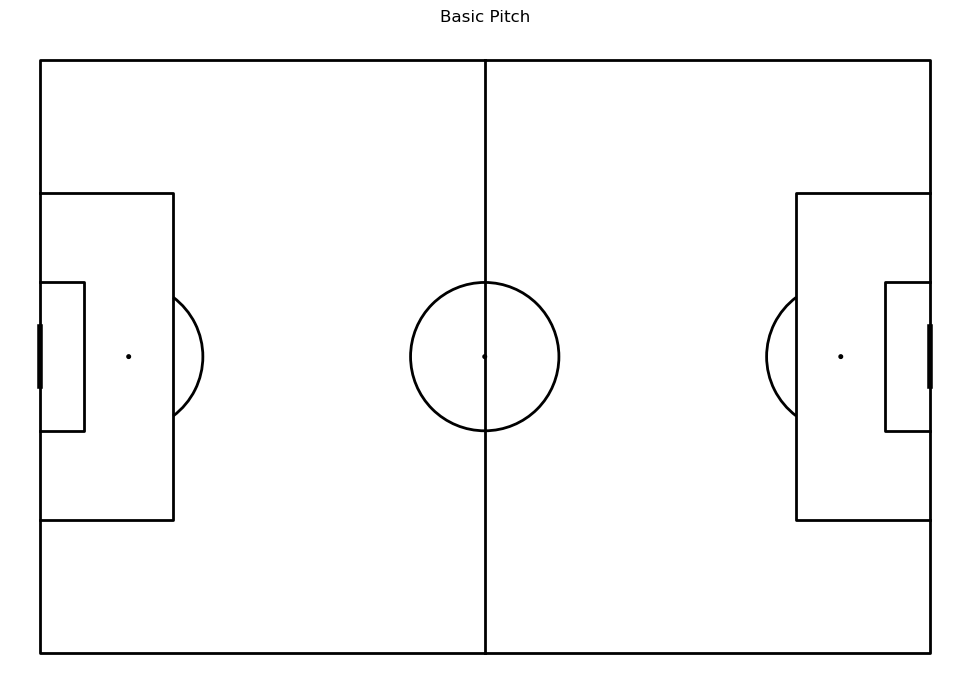

In [4]:
# Step 1: Draw a Basic Pitch

pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))
ax.set_title("Basic Pitch")
plt.show()

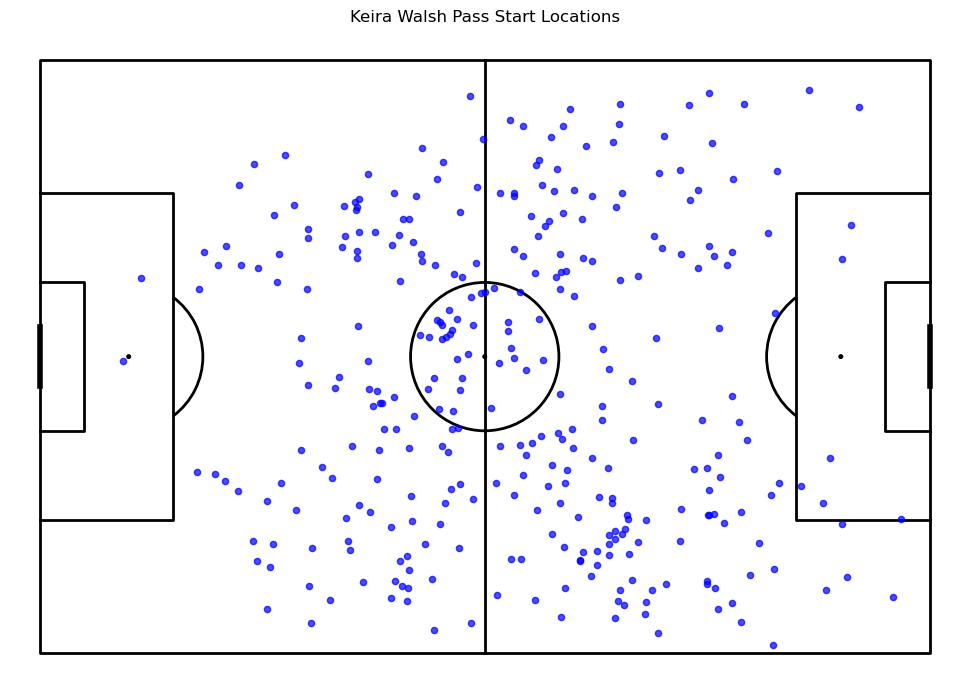

In [12]:
# Step 2: Plot Player Passes as Simple Dots

player_name = "Keira Walsh"
passes = euros_2025[euros_2025['player'] == player_name]

fig, ax = pitch.draw(figsize=(10, 7))
ax.scatter(passes['start_x'], passes['start_y'], s=20, color='blue', alpha=0.7)
ax.set_title(f"{player_name} Pass Start Locations")
plt.show()

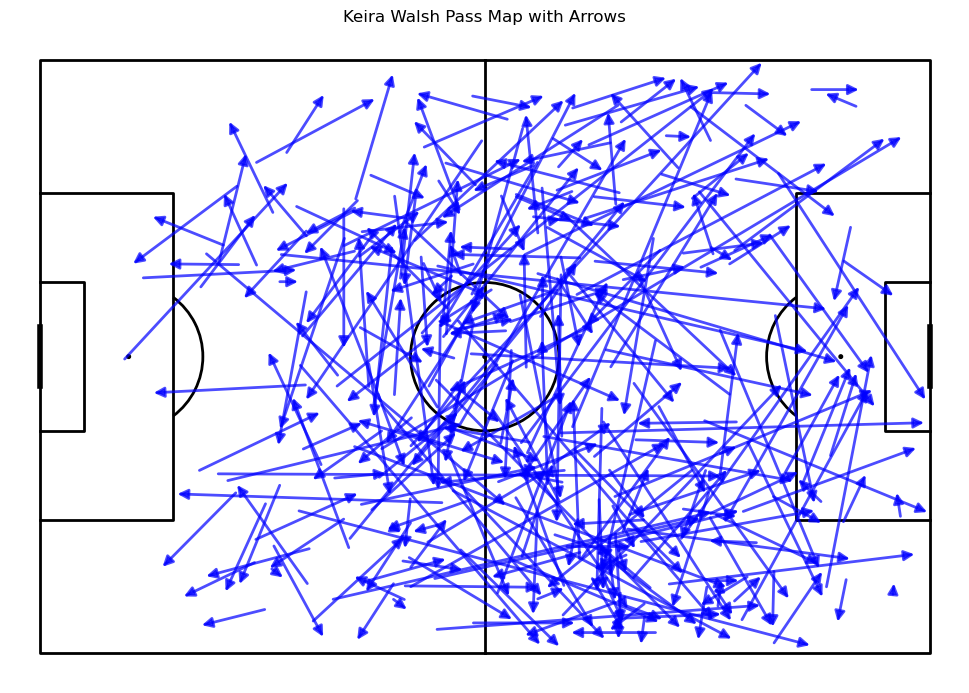

In [13]:
# Step 3: Add Arrows for Passes

from matplotlib.patches import FancyArrowPatch

fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    # Calculate start and end
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    # Ensure the arrow is visible by using a proper mutation scale
    arrow = FancyArrowPatch(
        (x_start, y_start),
        (x_end, y_end),
        color='blue',
        arrowstyle='-|>',   # standard arrow
        linewidth=2,
        alpha=0.7,
        mutation_scale=15   # makes the arrowhead visible
    )
    
    ax.add_patch(arrow)

ax.set_title(f"{player_name} Pass Map with Arrows")
plt.show()

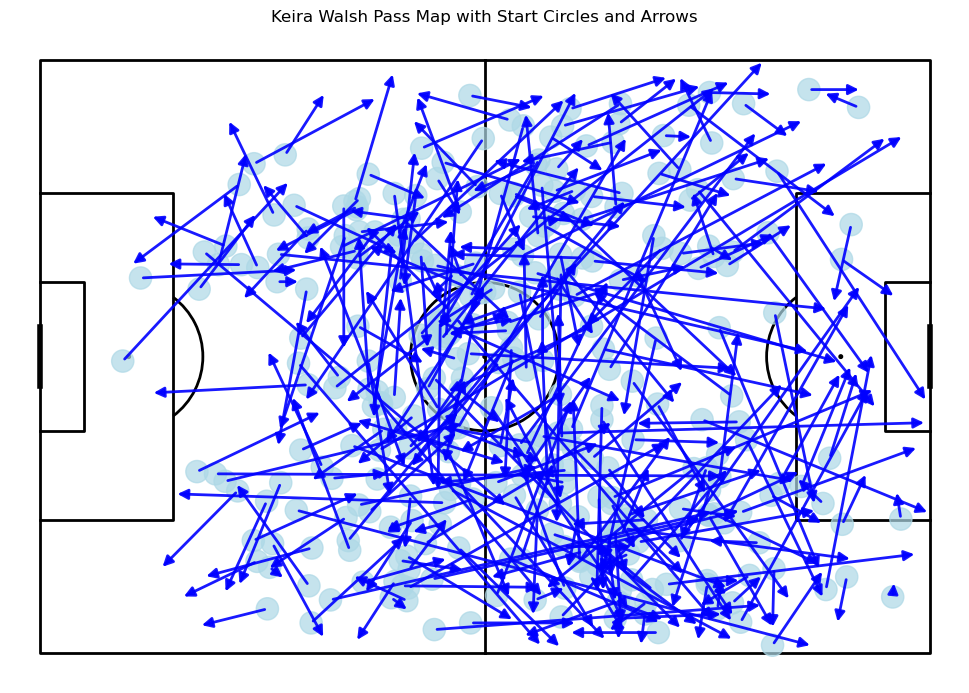

In [17]:
# Step 4: Add circle where pass comes from

fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    # -------------------- Draw circle at start of pass --------------------
    ax.add_patch(plt.Circle(
        (x_start, y_start),
        radius=1.5,
        color='lightblue',  # can later be gradient or position-based
        alpha=0.7,
        zorder=1  # ensure it’s below the arrow
    ))
    
    # -------------------- Draw arrow --------------------
    arrow = FancyArrowPatch(
        (x_start, y_start),
        (x_end, y_end),
        color='blue',       # can later be gradient or position-based
        arrowstyle='-|>',
        linewidth=2,
        alpha=0.9,
        mutation_scale=15,
        zorder=2  # ensures arrow is drawn on top
    )
    ax.add_patch(arrow)

ax.set_title(f"{player_name} Pass Map with Start Circles and Arrows")
plt.show()

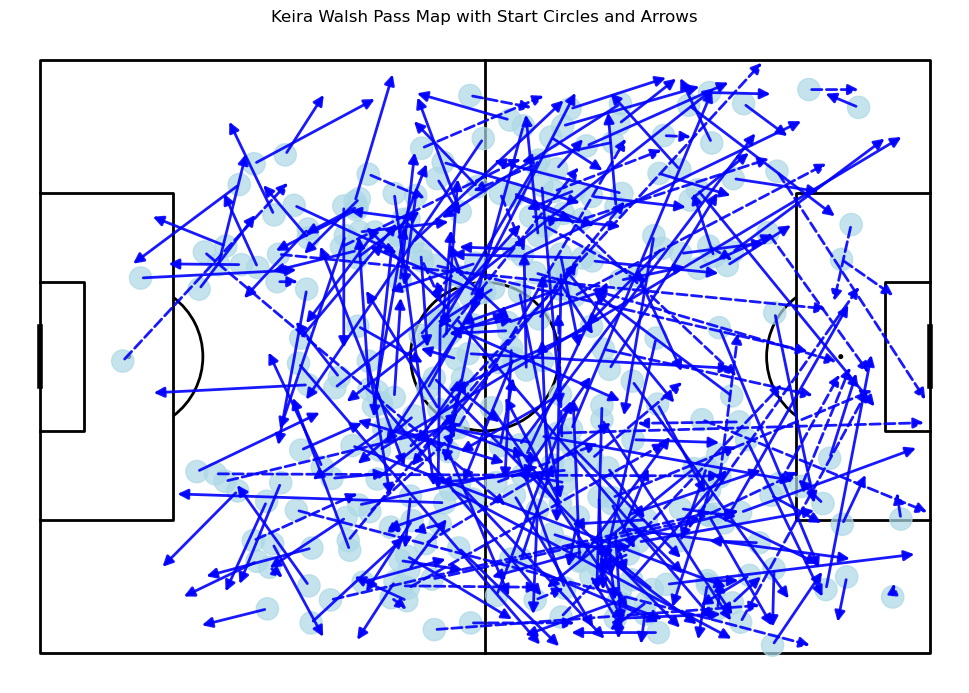

In [18]:
# Step 5: Add Completion Status (Solid vs Dashed Arrows)

fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    # -------------------- Draw circle at start of pass --------------------
    ax.add_patch(plt.Circle(
        (x_start, y_start),
        radius=1.5,
        color='lightblue',  # can later be gradient or position-based
        alpha=0.7,
        zorder=1  # ensure it’s below the arrow
    ))
    
    # -------------------- Draw arrow --------------------
    linestyle = '-' if p['completed'] else '--'
    arrow = FancyArrowPatch(
        (x_start, y_start),
        (x_end, y_end),
        color='blue',       # can later be gradient or position-based
        arrowstyle='-|>',
        linewidth=2,
        alpha=0.9,
        mutation_scale=15,
        linestyle=linestyle,
        zorder=2  # ensures arrow is drawn on top
    )
    ax.add_patch(arrow)

ax.set_title(f"{player_name} Pass Map with Start Circles and Arrows")
plt.show()

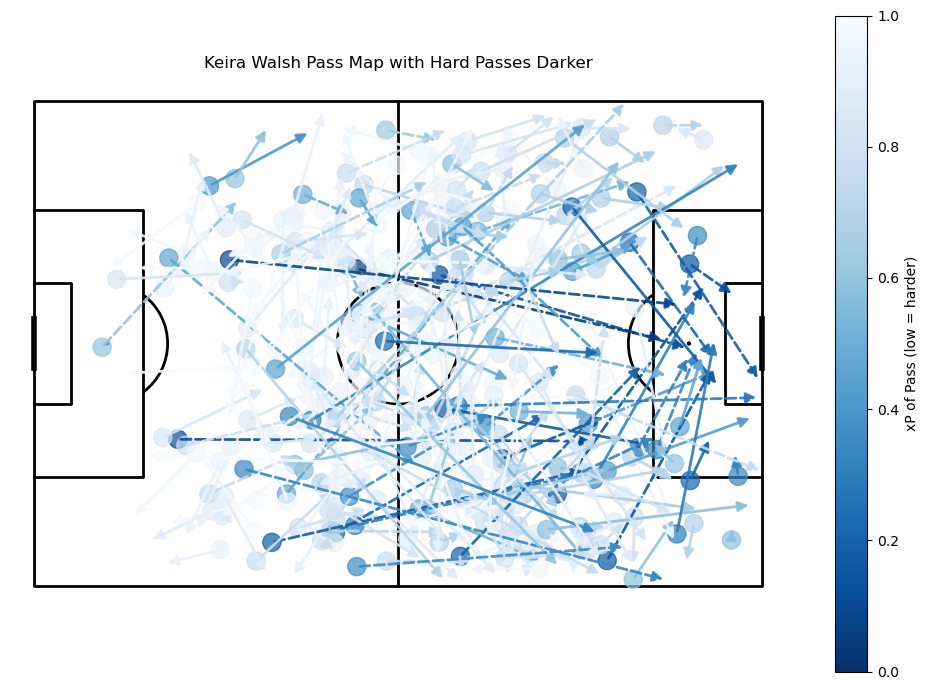

In [19]:
# Step 5: Color Arrows (and Circles) by Expected Pass Value (xP)

# Use a colormap (e.g., Blues) to show low-xP passes in darker or more intense colours.
# Apply the same color to the start-point circle and the arrow for visual consistency.

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.cm import ScalarMappable

cmap = plt.cm.Blues_r  # reversed so low xP = dark, high xP = light

fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    # Use raw xP values (0-1) directly in the colormap
    color = cmap(p['xP'])
    linestyle = '-' if p['completed'] else '--'
    
    # Circle at pass start
    ax.add_patch(plt.Circle(
        (x_start, y_start),
        radius=1.5,
        color=color,
        alpha=0.7,
        zorder=1
    ))
    
    # Arrow
    arrow = FancyArrowPatch(
        (x_start, y_start),
        (x_end, y_end),
        color=color,
        arrowstyle='-|>',
        linewidth=2,
        alpha=0.9,
        mutation_scale=15,
        linestyle=linestyle,
        zorder=2
    )
    ax.add_patch(arrow)

# Colorbar using raw xP values
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=ax, label='xP of Pass (low = harder)')

ax.set_title(f"{player_name} Pass Map with Hard Passes Darker")
plt.show()

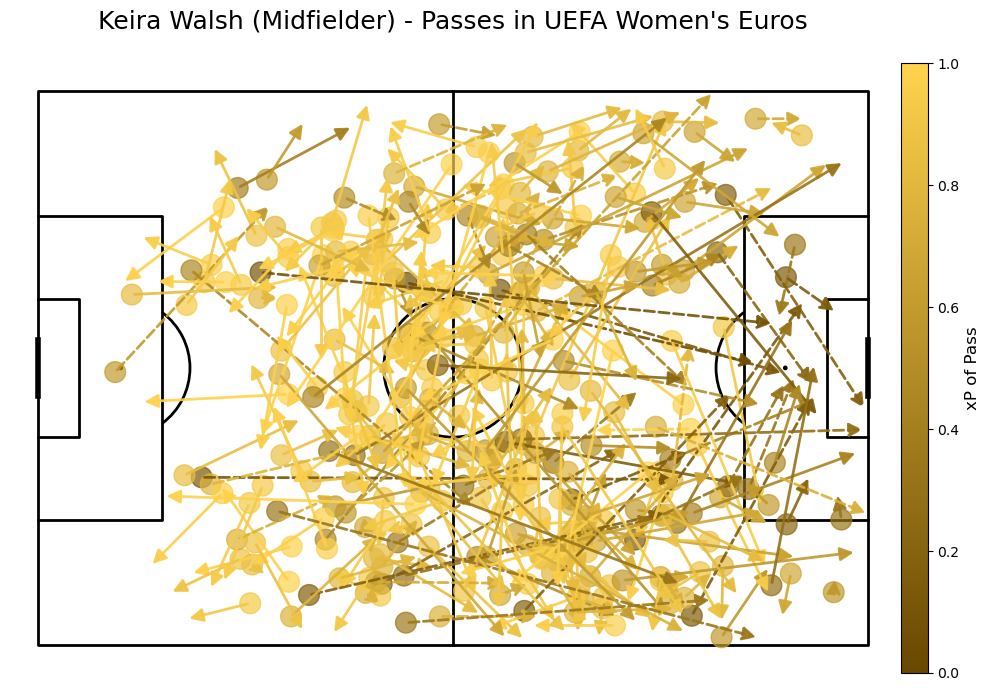

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import LinearSegmentedColormap, Normalize, to_rgb
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

# -------------------- Get player position --------------------
player_row = player_stats_euros[player_stats_euros['player'] == player_name]
if player_row.empty:
    print(f"Skipping {player_name} — not found in stats")
player_position = player_row['primary_main_position'].dropna().iloc[0].strip().title()

# -------------------- Position color palettes --------------------
position_palette = {
    'Goalkeeper': 'royalblue', 
    'Defender':   'limegreen',  
    'Midfielder': '#d18f00',   # amber
    'Forward':    'orangered',   
}

light_shade_dict = {
    'Goalkeeper': to_rgb('#7ec8ff'),
    'Defender':   to_rgb('#7dff7d'),
    'Midfielder': to_rgb('#ffd34d'),  # warm yellow
    'Forward':    to_rgb('#ff9a76'),
}

# Base and gradient colors
base_color = position_palette.get(player_position, 'grey')
rgb = to_rgb(base_color)
light_rgb = light_shade_dict.get(player_position, tuple(min(c * 1.2, 0.95) for c in rgb))  # clipped light
dark_rgb = tuple(c * 0.5 for c in rgb)

# -------------------- Create position-based gradient --------------------
position_cmap = LinearSegmentedColormap.from_list(
    f"{player_position}_gradient",
    [dark_rgb, light_rgb]
)

# -------------------- Filter passes --------------------
passes = euros_2025[
    (euros_2025['player'] == player_name) &
    euros_2025['type'].str.contains('Pass', na=False)
].dropna(subset=['start_x', 'start_y', 'end_x', 'end_y', 'xP', 'completed'])

if passes.empty:
    print(f"No passes found for {player_name}")

# -------------------- Draw pitch --------------------
fig, ax = pitch.draw(figsize=(10, 7))

# -------------------- Plot passes --------------------
for _, thepass in passes.iterrows():
    x, y = thepass['start_x'], thepass['start_y']
    dx = thepass['end_x'] - x
    dy = thepass['end_y'] - y
    
    # Color from position gradient using raw xP
    color = position_cmap(thepass['xP'])
    linestyle = '-' if thepass['completed'] else '--'
    
    # Circle at pass start
    ax.add_patch(plt.Circle(
        (x, y),
        radius=1.5,
        color=color,
        alpha=0.7,
        zorder=1
    ))
    
    # Arrow
    arrow = FancyArrowPatch(
        (x, y),
        (x + dx, y + dy),
        color=color,
        arrowstyle='-|>',
        linewidth=2,
        alpha=0.9,
        mutation_scale=20,
        linestyle=linestyle,
        zorder=2
    )
    ax.add_patch(arrow)

# -------------------- Colorbar --------------------
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
pos = cax.get_position()
new_height = pos.height * 0.6
new_y0 = pos.y0 + (pos.height - new_height) / 2
cax.set_position([pos.x0, new_y0, pos.width, new_height])

sm = ScalarMappable(cmap=position_cmap, norm=Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('xP of Pass', fontsize=12)  # set label font size separately

# -------------------- Title --------------------
ax.set_title(f"{player_name} ({player_position}) - Passes in UEFA Women's Euros",
             fontsize=18, pad=25)

plt.show()

In [22]:
# FUNCTION TO PLOT PLAYER PASSES - final version

def plot_player_pass_map(player_name, dataset, player_stats, competition_label):
    
    # -------------------- Get player position --------------------
    player_row = player_stats[player_stats['player'] == player_name]
    if player_row.empty:
        print(f"Skipping {player_name} — not found in stats")
        return
    
    player_position = player_row['primary_main_position'].dropna().iloc[0].strip().title()

    # -------------------- Position color palettes --------------------
    position_palette = {
        'Goalkeeper': 'royalblue', 
        'Defender':   'limegreen',  
        'Midfielder': '#d18f00',   # darker amber base (better visibility)
        'Forward':    'orangered',   
    }

    light_shade_dict = {
        'Goalkeeper': to_rgb('#7ec8ff'),
        'Defender':   to_rgb('#7dff7d'),
        'Midfielder': to_rgb('#ffd34d'),  # warm yellow (not pale)
        'Forward':    to_rgb('#ff9a76'),
    }

    if player_position not in position_palette:
        print(f"Warning: {player_name} position '{player_position}' not in palette")
    
    base_color = position_palette.get(player_position, 'grey')
    rgb = to_rgb(base_color)
    light_rgb = light_shade_dict.get(player_position, (0.8, 0.8, 0.8))
    dark_rgb = tuple(c * 0.5 for c in rgb)

    position_cmap = LinearSegmentedColormap.from_list(
        f"{player_position}_gradient",
        [dark_rgb, light_rgb]
    )

    # -------------------- Filter passes --------------------
    passes = dataset[
        (dataset['player'] == player_name) &
        dataset['type'].str.contains('Pass', na=False)
    ].dropna(subset=['start_x', 'start_y', 'end_x', 'end_y', 'xP', 'completed'])

    if passes.empty:
        print(f"No passes found for {player_name}")
        return

    norm = Normalize(vmin=0, vmax=1)

    # -------------------- Create pitch --------------------
    pitch = Pitch(line_color="black")
    fig, ax = pitch.draw(figsize=(10, 7))

    # -------------------- Plot passes --------------------
    for _, thepass in passes.iterrows():
        x, y = thepass['start_x'], thepass['start_y']
        dx = thepass['end_x'] - x
        dy = thepass['end_y'] - y
        
        color = position_cmap(norm(thepass['xP']))
        
        ax.add_patch(plt.Circle((x, y), 1.5, color=color, alpha=0.7))
        
        arrow = FancyArrowPatch(
            (x, y), (x + dx, y + dy),
            color=color,
            arrowstyle='-|>',
            linewidth=2,
            alpha=0.9,
            mutation_scale=20,
            linestyle='--' if not thepass['completed'] else '-'
        )
        ax.add_patch(arrow)

    # -------------------- Title --------------------
    ax.set_title(
    f"{player_name} ({player_position}) - Passes in {competition_label}",
    fontsize=18,
    pad=25   # increase this number to move title higher
    )


    # -------------------- Colorbar --------------------
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)

    pos = cax.get_position()
    new_height = pos.height * 0.6
    new_y0 = pos.y0 + (pos.height - new_height) / 2
    cax.set_position([pos.x0, new_y0, pos.width, new_height])

    sm = plt.cm.ScalarMappable(cmap=position_cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('xP of Pass', fontsize=12)

    plt.show()



# MASTER LOOP FUNCTION

def plot_multiple_players(players, competition="euros"):
    
    if competition.lower() == "euros":
        dataset = euros_2025
        stats = player_stats_euros
        label = "UEFA Women's Euros"
        
    elif competition.lower() == "worldcup":
        dataset = worldcup_all
        stats = player_stats_worldcup
        label = "FIFA Women's World Cups"
        
    else:
        raise ValueError("competition must be 'euros' or 'worldcup'")

    for player in players:
        print(f"Plotting {player}...")
        plot_player_pass_map(player, dataset, stats, label)

Plotting Alessia Russo...


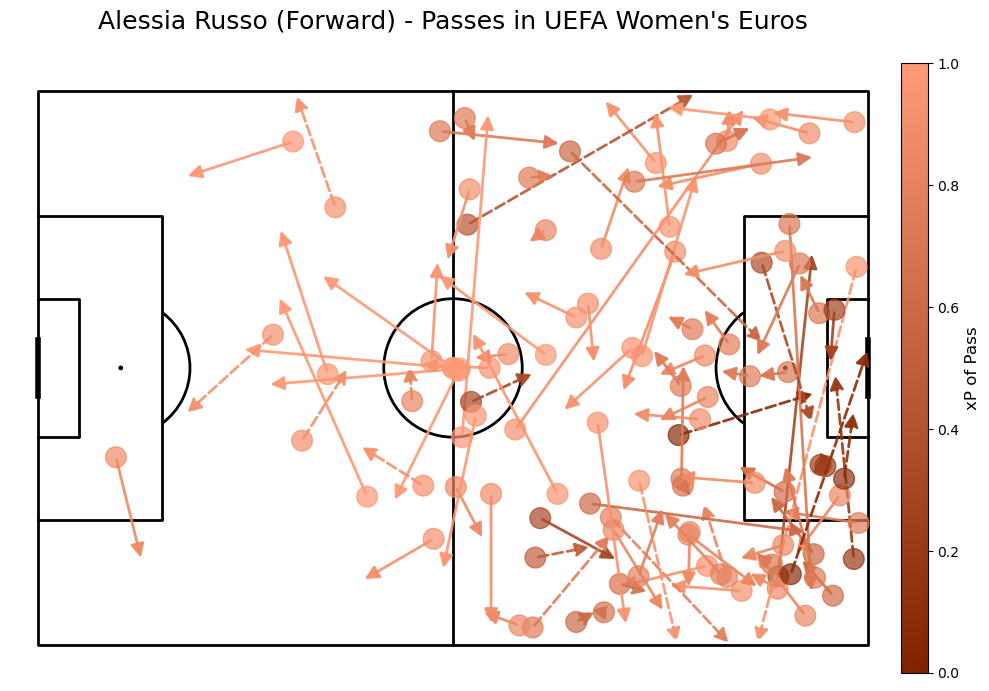

Plotting Ella Toone...


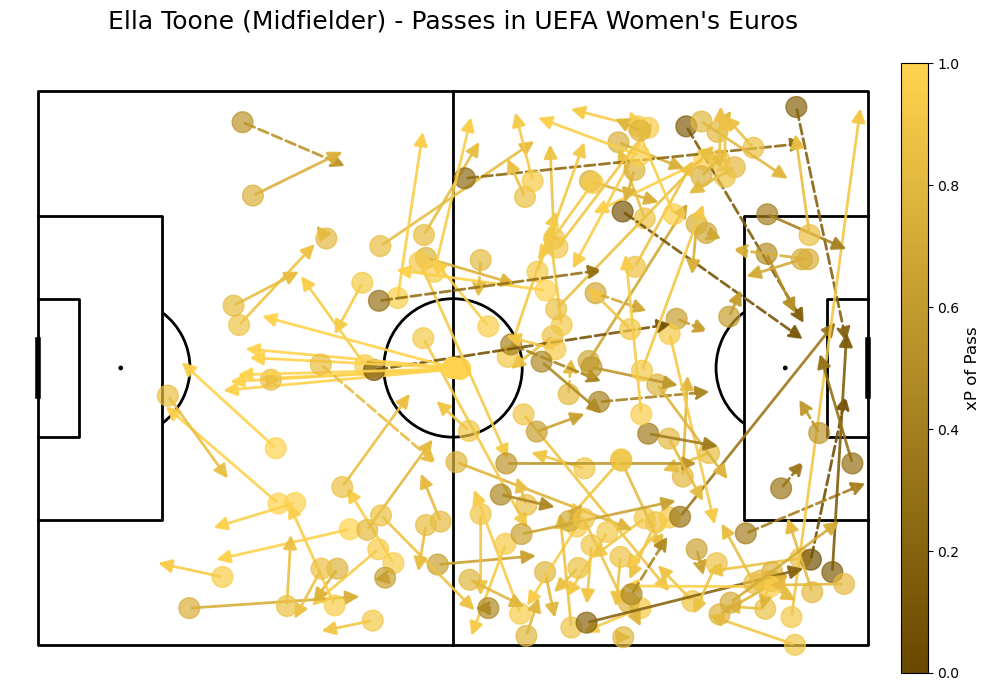

Plotting Keira Walsh...


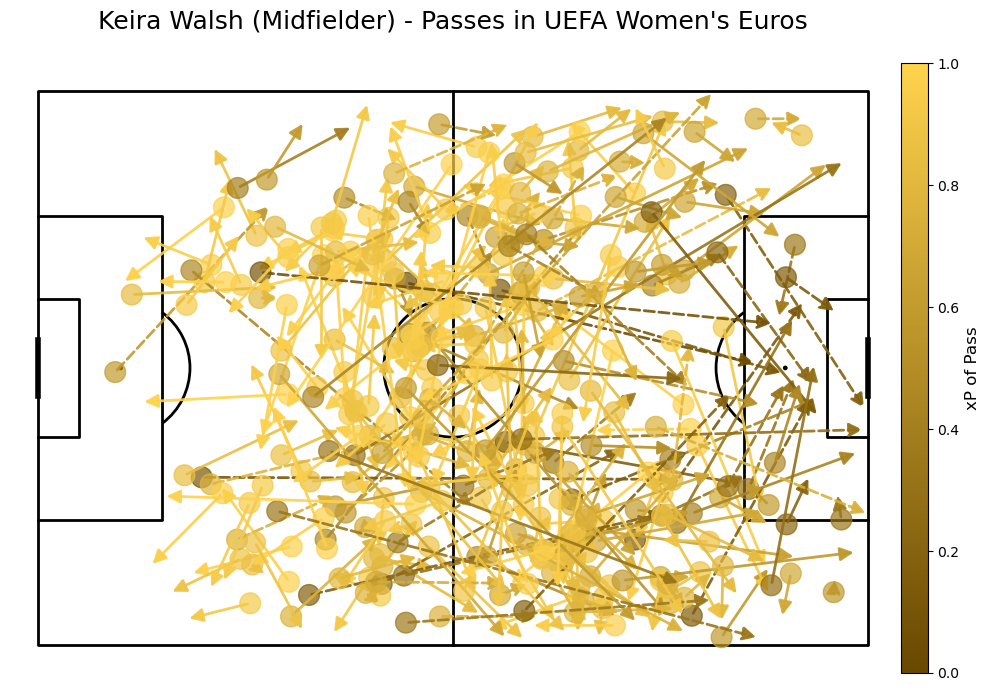

Plotting Hannah Hampton...


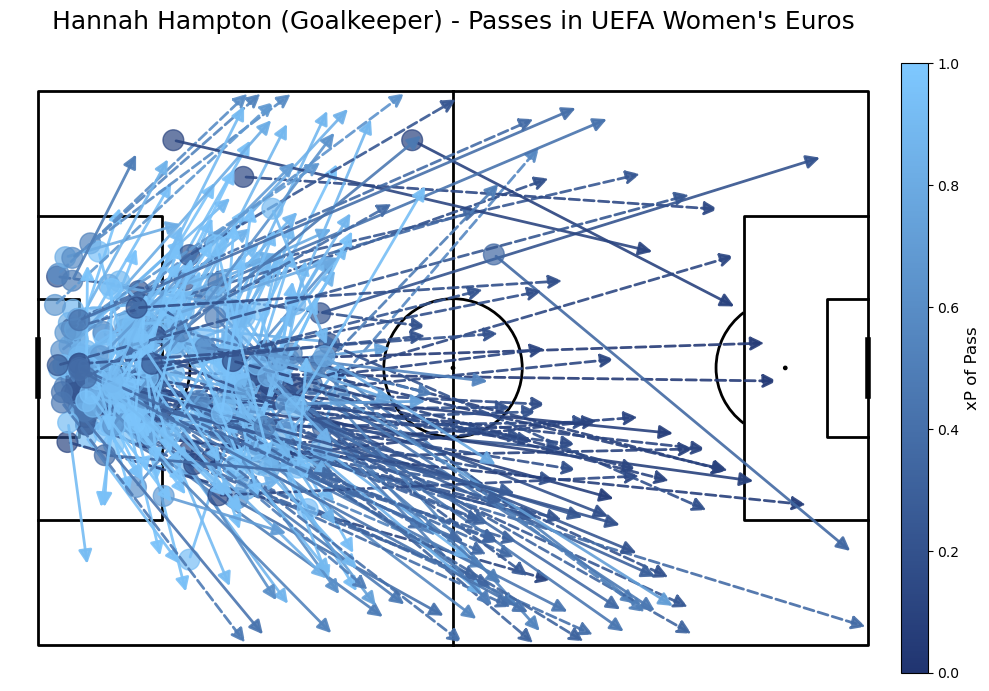

In [23]:
players_to_plot = [
    'Alessia Russo',
    'Ella Toone',
    'Keira Walsh',	
    'Hannah Hampton'
]

plot_multiple_players(players_to_plot, competition="euros")